# importing libraries

In [ ]:
import numpy as np
import pandas as pd
import requests
import json
from io import StringIO

from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# creating input data

In [ ]:
def calculate_metrics(ticker):
    # Fetch price data
    price_url = f'https://eodhd.com/api/eod/{ticker}.US?from=2022-01-01&to=2022-12-31&period=d&api_token=6156f2d1c12e19.46412053&fmt=csv'
    price_data = requests.get(price_url).content
    df_price = pd.read_csv(StringIO(price_data.decode()))

    # Calculate Return
    df_price['Return'] = df_price['Adjusted_close'].pct_change()
    average_return = df_price['Return'].mean()

    # Calculate Volatility
    volatility = df_price['Adjusted_close'].pct_change().rolling(window=(len(df_price) - 1)).std().iloc[-1]

    # Fetch dividend data
    dividend_url = f'https://eodhd.com/api/div/{ticker}.US?from=2022-01-01&to=2022-12-31&api_token=6156f2d1c12e19.46412053&fmt=json'
    dividend_data = requests.get(dividend_url).json()
    annual_dividend = sum(item['value'] for item in dividend_data)

    # Calculate Dividend Yield
    dividend_yield = (annual_dividend / average_return) * 100

    # Return a Series with the results
    return pd.Series({
        'Ticker': ticker,
        'Return': average_return,
        'Volatility': volatility,
        'Dividend_Yield': dividend_yield
    })

In [ ]:
tickers =[
    'MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ADM', 'ADBE', 'ADP', 'AES', 'AFL',
    'A', 'ABNB', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT',
    'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP',
    'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS',
    'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T',
    'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'AXON', 'BKR', 'BALL', 'BAC', 'BBWI',
    'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BX',
    'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO',
    'BF-B', 'BG', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX',
    'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'COR', 'CNC'
]

In [ ]:
ticker_metric_data = pd.DataFrame()

# Iterate over tickers and calculate metrics for each
for ticker in tickers:
    result_df_ticker = calculate_metrics(ticker)
    ticker_metric_data = ticker_metric_data.append(result_df_ticker, ignore_index=True)

<ipython-input-4-7c6545ffcfb5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ticker_metric_data = ticker_metric_data.append(result_df_ticker, ignore_index=True)
<ipython-input-4-7c6545ffcfb5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ticker_metric_data = ticker_metric_data.append(result_df_ticker, ignore_index=True)
<ipython-input-4-7c6545ffcfb5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ticker_metric_data = ticker_metric_data.append(result_df_ticker, ignore_index=True)
<ipython-input-4-7c6545ffcfb5>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ticker_metric_data = ticker_metric_data.append(result_df_ticker, ignore_

In [ ]:
ticker_metric_data

,Ticker,Return,Volatility,Dividend_Yield
0,MMM,-0.001258,0.017213,-473629.245873
1,AOS,-0.001245,0.019703,-91540.629897
2,ABT,-0.000737,0.016818,-255212.932591
3,ABBV,0.000961,0.014129,587186.620207
4,ACN,-0.001418,0.020882,-284274.416671
...,...,...,...,...
95,CBRE,-0.001147,0.021602,-0.000000
96,CDW,-0.000313,0.019618,-667957.478157
97,CE,-0.001558,0.025593,-175831.247587
98,COR,0.001052,0.014886,177266.595823


# data preprocessing

In [ ]:
df = ticker_metric_data.copy()
# Assuming df is your DataFrame
# Extract the columns you want to standardize
columns_to_standardize = ['Return', 'Volatility', 'Dividend_Yield']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# predicting number of clusters

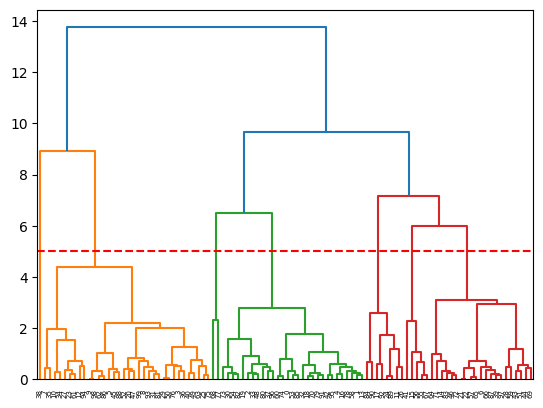

In [ ]:
import scipy.cluster.hierarchy as sch
# create dendrogram
dendrogram1 = sch.dendrogram(sch.linkage(df.iloc[:,1:], method='ward'))
plt.axhline(y=5, color='r', linestyle='--')

# heirchecla model

In [ ]:
# import hierarchical clustering libraries
from sklearn.cluster import AgglomerativeClustering

# create clusters
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df.iloc[:,1:])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
df['cluster'] = y_hc
dt = df.groupby('cluster').mean()

<ipython-input-9-1cb36e1310f4>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dt = df.groupby('cluster').mean()


# results

([0, 1, 2],
 [Text(0, 0, 'Return'),
  Text(1, 0, 'Volatility'),
  Text(2, 0, 'Dividend_Yield')])

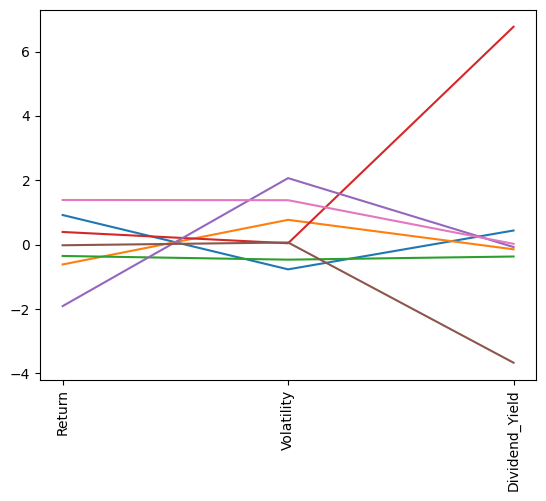

In [ ]:
plt.plot(dt.T)
plt.xticks(rotation=90)

# validation

In [ ]:
new_ticker_metric_data = ticker_metric_data.copy()
new_ticker_metric_data['cluster'] = y_hc
new_ticker_metric_data_desc = new_ticker_metric_data.sort_values(by='Return', ascending=False)
new_ticker_metric_data_desc.reset_index(inplace=True)
new_ticker_metric_data_desc.drop('index',axis=1,inplace=True)

In [ ]:
new_ticker_metric_data_desc

,Ticker,Return,Volatility,Dividend_Yield,cluster
0,APA,0.002794,0.037084,22368.732014,6
1,CAH,0.001836,0.017155,107701.816268,0
2,ACGL,0.001526,0.017598,0.000000,0
3,ADM,0.001522,0.019651,105096.625802,0
4,WRB,0.001347,0.015728,64843.836498,0
...,...,...,...,...,...
95,KMX,-0.002384,0.032554,-0.000000,4
96,AMD,-0.002621,0.038459,-0.000000,4
97,CCL,-0.002706,0.048499,-0.000000,4
98,CTLT,-0.003467,0.033932,-0.000000,4


In [ ]:
ticker_with_max_return_clustered = new_ticker_metric_data_desc.loc[df['cluster'] == 6, 'Ticker']
ticker_with_max_return=new_ticker_metric_data_desc['Ticker'].head(5)

In [ ]:
ticker_with_max_return_clustered

15     ALL
41     BWA
55     AWK
56    ALLE
67    AAPL
Name: Ticker, dtype: object

In [ ]:
ticker_with_max_return

0     APA
1     CAH
2    ACGL
3     ADM
4     WRB
Name: Ticker, dtype: object

In [ ]:
clustered_list=['ALL','BWA','AWK','ALLE','AAPL']
non_clustered_list = ['APA','CAH','ACGL','ADM','WRB']

In [ ]:
clustered_return =[]
for ticker in clustered_list :
  returns=new_ticker_metric_data_desc.loc[new_ticker_metric_data_desc['Ticker'] == ticker, 'Return'].values
  clustered_return.append(returns)

In [ ]:
unclustered_return =[]
for ticker in non_clustered_list :
  returns=new_ticker_metric_data_desc.loc[new_ticker_metric_data_desc['Ticker'] == ticker, 'Return'].values
  unclustered_return.append(returns)

In [ ]:
clustured_2023 = []
for ticker in clustered_list :
  price_url = f'https://eodhd.com/api/eod/{ticker}.US?from=2023-01-01&period=d&api_token=6156f2d1c12e19.46412053&fmt=csv'
  price_data = requests.get(price_url).content
  df_price = pd.read_csv(StringIO(price_data.decode()))
  df_price['Return'] = df_price['Adjusted_close'].pct_change()
  average_return = df_price['Return'].mean()
  weightage =  (new_ticker_metric_data_desc.loc[new_ticker_metric_data_desc['Ticker'] == ticker, 'Return'].values)/(sum(clustered_return))
  clustured_2023.append(average_return*weightage)

In [ ]:
non_clustered_2023 =[]
for ticker in non_clustered_list :
  price_url = f'https://eodhd.com/api/eod/{ticker}.US?from=2023-01-01&period=d&api_token=6156f2d1c12e19.46412053&fmt=csv'
  price_data = requests.get(price_url).content
  df_price = pd.read_csv(StringIO(price_data.decode()))
  df_price['Return'] = df_price['Adjusted_close'].pct_change()
  average_return = df_price['Return'].mean()
  weightage =  (new_ticker_metric_data_desc.loc[new_ticker_metric_data_desc['Ticker'] == ticker, 'Return'].values)/(sum(unclustered_return))
  non_clustered_2023.append(average_return*weightage)

In [ ]:
print(sum(clustured_2023))

[0.00111218]


In [ ]:
print(sum(non_clustered_2023))

[0.00037562]
